In [452]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [453]:
import numpy as np
import pandas as pd

In [454]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [455]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_, or_, Date

In [456]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [457]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [458]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [459]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [460]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

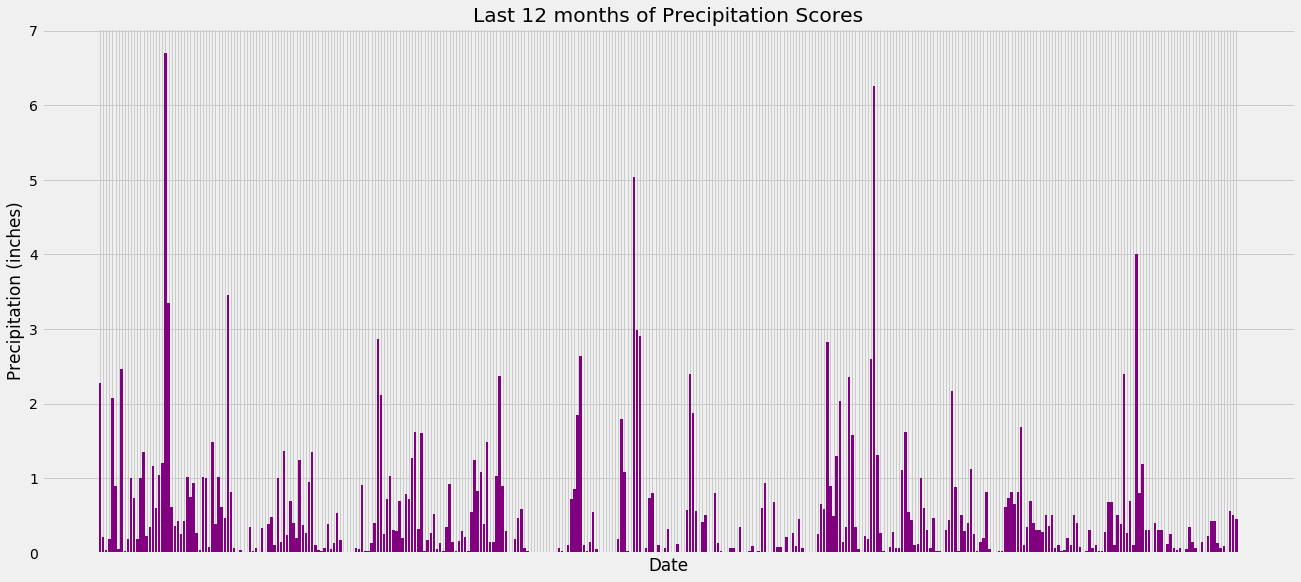

In [461]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

        # Find most recent date of record
most_recent_date = session.query(func.strftime('%m/%d/%Y', Measurement.date)).order_by(Measurement.date.desc()).limit(1).all() 
max_date = [x[0] for x in most_recent_date]
max_date = (max_date[0])

      
max_date = dt.datetime.strptime(max_date,'%m/%d/%Y')


# Calculate the date 1 year ago from the last data point in the database
year_ago = max_date - dt.timedelta(days=365)

        # Format dates for filtering
maxdatey = int(date.strftime(max_date,'%Y'))
maxdatem = int(date.strftime(max_date,'%m'))
maxdated = int(date.strftime(max_date,'%d'))

yearago = date.strftime(year_ago,'%m/%d/%Y')
yearagoy = int(date.strftime(year_ago,'%Y'))
yearagom = int(date.strftime(year_ago,'%m'))
yearagod = int(date.strftime(year_ago,'%d'))

yearago = dt.date(yearagoy, yearagom, yearagod)
maxdate = dt.date(maxdatey, maxdatem, maxdated)



# Perform a query to retrieve the data and precipitation scores
 
last_12 = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > yearago).filter(Measurement.date <= maxdate).order_by(Measurement.date.desc()).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12, columns=['date', 'prcp'])
df = df.set_index('date')

# # Sort the dataframe by date
df = df.sort_values('date', axis = 0, ascending = True)


# # Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize=(20, 9))

# Add x-axis and y-axis
ax.bar(df.index.values,
        df['prcp'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Last 12 months of Precipitation Scores")

# Rotate tick marks on x-axis
plt.tick_params(axis='x',  which='both', bottom=False, top=False, labelbottom=False)

plt.show()



In [462]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df[['prcp']].describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [463]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).distinct(Measurement.station).count()
print(f'There are {9} stations in the dataset')

There are 9 stations in the dataset


In [464]:
# What are the most active stations? (i.e. what stations have the most rows)?
    # List the stations and the counts in descending order.
measurement_count = func.count(Measurement.id)
Activity = session.query(Measurement.station, measurement_count).group_by(Measurement.station).order_by(measurement_count.desc()).all()
print(Activity)

    # What are the most active stations? (i.e. what stations have the most rows)?
Active = (Activity[0:3])
print(f'The top 3 stations from highest to lowest are {Active[0][0]}, {Active[1][0]}, and {Active[2][0]}')


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
The top 3 stations from highest to lowest are USC00519281, USC00519397, and USC00513117


In [465]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Highest = Active[0][0]
print(Highest)

Lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station==Highest).all()
Highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station==Highest).all()
Average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station==Highest).all()

print(f'The lowest temperature recorded for {Highest} is {Lowest_temp[0][0]} degrees')
print(f'The highest temperature recorded for {Highest} is {Highest_temp[0][0]} degrees')
print(f'The average temperature recorded for {Highest} is {Average_temp[0][0]} degrees')


USC00519281
The lowest temperature recorded for USC00519281 is 54.0 degrees
The highest temperature recorded for USC00519281 is 85.0 degrees
The average temperature recorded for USC00519281 is 71.66378066378067 degrees


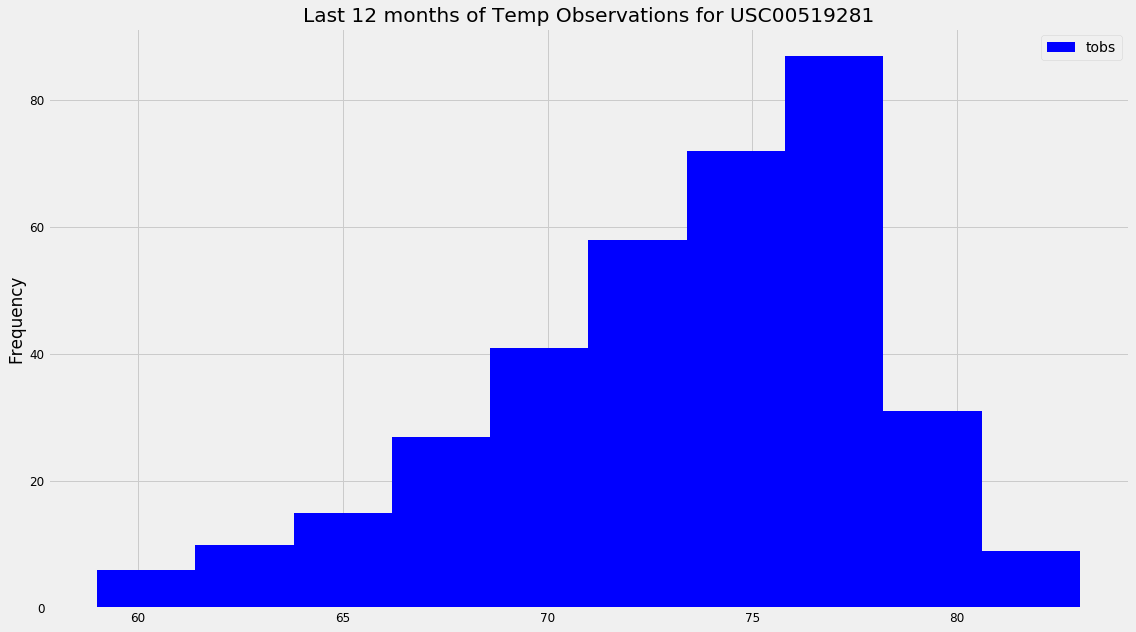

In [466]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


        # Find most recent date of record for station
most_recent_date = session.query(func.strftime('%m/%d/%Y', Measurement.date)).filter(Measurement.station==Highest).order_by(Measurement.date.desc()).limit(1).all() 
max_dateh = [x[0] for x in most_recent_date]
max_dateh = (max_dateh[0])

        #Calculate date 12 months from most recent date
max_dateh = dt.datetime.strptime(max_dateh,'%m/%d/%Y')

# Calculate the date 1 year ago from the last data point in the database
year_agoh = max_dateh - dt.timedelta(days=365)


        # Format dates for filtering
maxdateyh = int(date.strftime(max_dateh,'%Y'))
maxdatemh = int(date.strftime(max_dateh,'%m'))
maxdatedh = int(date.strftime(max_dateh,'%d'))

yearagoh = date.strftime(year_agoh,'%m/%d/%Y')
yearagoyh = int(date.strftime(year_agoh,'%Y'))
yearagomh = int(date.strftime(year_agoh,'%m'))
yearagodh = int(date.strftime(year_agoh,'%d'))

yearagoh = dt.date(yearagoyh, yearagomh, yearagodh)
maxdateh = dt.date(maxdateyh, maxdatemh, maxdatedh)


      

highest_12 = session.query(Measurement.date,Measurement.tobs).filter(Measurement.station==Highest).filter(Measurement.date > yearagoh).filter(Measurement.date <= maxdateh).order_by(Measurement.date.desc()).all()

dfh = pd.DataFrame(highest_12, columns=['date', 'tobs'])
dfh = dfh.set_index('date')


dfh.plot(figsize=(16,9), kind = 'hist',color = 'blue', title = 'Last 12 months of Temp Observations for USC00519281',  fontsize = 12)

plt.tight_layout()
plt.show()


## Bonus Challenge Assignment

In [467]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [468]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_list = (calc_temps('2017-07-20', '2017-07-24'))
print(temp_list)

[(72.0, 78.25806451612904, 82.0)]


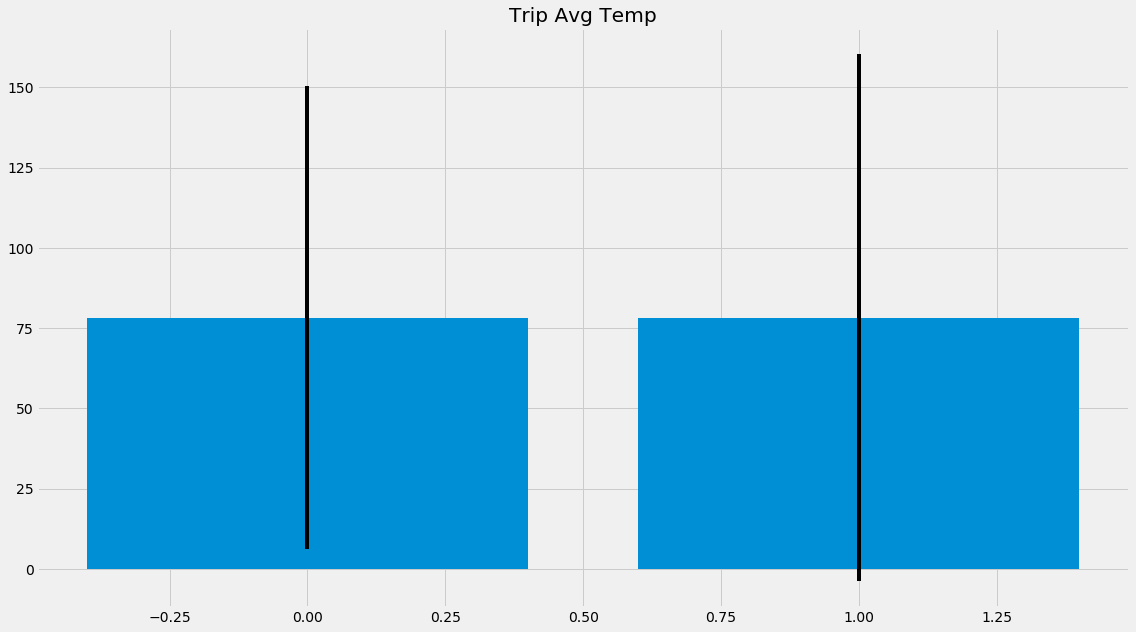

In [469]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y_axis = temp_list[0][1]
x_axis = np.arange(len(temp_list[0])-1)
yerr1 = temp_list[0][0]
yerr2 = temp_list[0][2]
title = 'Trip Avg Temp'


plt.figure(figsize=(16,9))

plt.bar(x_axis, y_axis, yerr = (yerr1, yerr2))
plt.title(title)
plt.tight_layout()
plt.show()

In [470]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start2017 = dt.date(2017, 7, 20)
end2017 = dt.date(2017, 7, 24)

amount = func.avg(Measurement.prcp)

combined = session.query(amount, Station.station, Station.latitude, Station.longitude, Station.elevation).join(Measurement, Measurement.station == Station.station).filter(Measurement.date >= start2017).filter(Measurement.date <= end2017).group_by(Measurement.station).order_by(amount.desc()).all() 

dfc = pd.DataFrame(combined, columns=['Total Rainfall', 'Station', 'Latitude', 'Longitude', 'Elevation'])
dfc.head(10)

,Total Rainfall,Station,Latitude,Longitude,Elevation
0,1.288,USC00516128,21.33310,-157.80250,152.4
1,0.276,USC00514830,21.52130,-157.83740,7.0
2,0.220,USC00519281,21.45167,-157.84889,32.9
3,0.166,USC00513117,21.42340,-157.80150,14.6
4,0.110,USC00519523,21.33556,-157.71139,19.5
5,0.022,USC00519397,21.27160,-157.81680,3.0
6,0.000,USC00517948,21.39340,-157.97510,11.9


In [471]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [472]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

Start_date = "20-07-2018"
End_date = "24-07-2018"
# Use the start and end date to create a range of dates
# start = dt.datetime.strptime(Start_date,'%Y/%m/%d')
# end = dt.datetime.strptime(End_date,'%Y/%m/%d')
start = dt.datetime.strptime(Start_date, "%d-%m-%Y")
end = dt.datetime.strptime(End_date, "%d-%m-%Y")
date_generated = [start + dt.timedelta(days=x) for x in range(0, (end+dt.timedelta(days=1)-start).days)]

# Stip off the year and save a list of %m-%d strings
dlist = []
for date in date_generated:
    dlist.append(date.strftime("%m-%d"))
print(dlist)


# Loop through the list of %m-%d strings and calculate the normals for each date
dnorm = []
for d in dlist:
    dnorm.append(daily_normals(d))


dnorm = [x[0] for x in dnorm]
dnorm = [list(x) for x in dnorm] 
print(dnorm)

['07-20', '07-21', '07-22', '07-23', '07-24']
[[69.0, 75.46296296296296, 82.0], [69.0, 76.9245283018868, 83.0], [69.0, 75.78846153846153, 81.0], [70.0, 76.20370370370371, 84.0], [69.0, 76.55555555555556, 81.0]]


In [473]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
norms = dict(zip(dlist, dnorm))
norms
df_norm = pd.DataFrame.from_dict(norms, orient='index')
df_norm

,0,1,2
07-20,69.0,75.462963,82.0
07-21,69.0,76.924528,83.0
07-22,69.0,75.788462,81.0
07-23,70.0,76.203704,84.0
07-24,69.0,76.555556,81.0


Text(0, 0.5, 'Daily Normals')

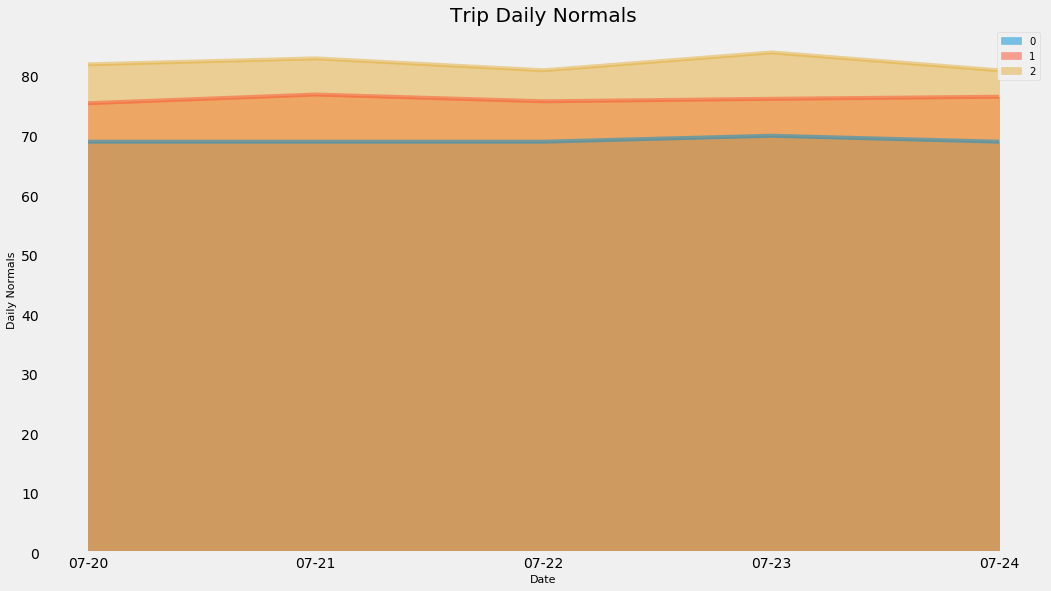

In [474]:
# Plot the daily normals as an area plot with `stacked=False`

df_norm.plot.area(stacked=False, figsize = (16,9), grid = False, title = "Trip Daily Normals", legend = "True")
plt.legend(loc='upper right',fontsize=10)
plt.xlabel("Date", fontsize=11)
plt.ylabel("Daily Normals", fontsize=11)